In [ ]:
import copy
import numpy as np
from sklearn import preprocessing
import h5py
import sklearn.svm
import random
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mt

In [2]:
class Layer:
    # constructor
    def __init__(self, neurons=0, theta=[], b=[], z=[], a=[],delta=[],DELTA_THETA=[],DELTA_BIAS=[],dTheta=[],dBias=[]):
        self.neurons = 0 # neurons count in layer
        self.theta = [] # Weight vector(W)
        self.b=[] # bias
        self.z = [] # hypothesis z = W.T * X + b = here = theta.T * X + b
        self.a = [] # activation function a=sigmoid(z) or relu(z) or anyother(z)
        self.delta = [] # Loss or Error function delta= delta_cross_entropy() or anyother()
        self.DELTA_THETA = [] # only derivative weight vector =dw
        self.DELTA_BIAS = [] # only derivative bias vector =db
        self.dTheta = [] # complete derivation term = (1/m)*(DELTA + (lambda*theta))
        self.dBias = [] # complete derivation term 

    def setNeurons(self, neurons):
        self.neurons = neurons

    def getNeurons(self):
        return self.neurons

    def setTheta(self, theta):
        self.theta = theta

    def getTheta(self):
        return self.theta

    def setB(self, b):
        self.b = b

    def getB(self):
        return self.b

    def setZ(self, z):
        self.z = z

    def getZ(self):
        return self.z

    def setA(self, a):
        self.a = a

    def getA(self):
        return self.a

    def setDelta(self, delta):
        self.delta = delta

    def getDelta(self):
        return self.delta

    def setDELTA_THETA(self, DELTA_THETA):
        self.DELTA_THETA = DELTA_THETA

    def getDELTA_THETA(self):
        return self.DELTA_THETA

    def setDELTA_BIAS(self, DELTA_BIAS):
        self.DELTA_BIAS = DELTA_BIAS

    def getDELTA_BIAS(self):
        return self.DELTA_BIAS
    
    def setDTheta(self, dTheta):
        self.dTheta = dTheta

    def getDTheta(self):
        return self.dTheta
    
    def setDBias(self, dBias):
        self.dBias = dBias

    def getDBias(self):
        return self.dBias
    
    

In [3]:
dataset = h5py.File('../MNIST_Subset-4.h5', 'r+')

print(list(dataset.keys()))

['X', 'Y']


In [4]:
data_X = dataset['X']
data_Y = dataset['Y']

X = np.array(data_X.value)
Y = np.array(data_Y.value)

print(X.shape,Y.shape)

# Y=Y.reshape(14251,1)
print(X.shape,Y.shape)

print(X.shape)
X=X.reshape(14251,28*28)
print(X.shape)

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=20)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

X=X_train #X= X_train
Y=Y_train #Y=Y_train

X = preprocessing.scale(X)
X_test=preprocessing.scale(X_test)

m=X.shape[0]
print('no.of samples:',m)

X=X.T # transposed X now shape=784 x 14251 => now each column is one datapoint
X_test=X_test.T
print(X.shape)

(14251, 28, 28) (14251,)
(14251, 28, 28) (14251,)
(14251, 28, 28)
(14251, 784)
(11400, 784) (2851, 784) (11400,) (2851,)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


no.of samples: 11400
(784, 11400)


In [5]:
def sigmoid(z):
    return (1.0/(1.0+np.exp(-z)))

In [6]:
def softmax(z):
    return np.divide(np.exp(z),np.sum(np.exp(z),axis=0))

In [7]:
def stableSoftmax(z):
    exps = np.exp(z - np.max(z))
    return np.divide(exps , np.sum(exps,axis=0))

In [8]:
def delta_cross_entropy(z,y):
    grad = (z-y)/m
    return grad

In [9]:
def crossEntropy(a,y):
    return (-y*np.log(a))/m

In [10]:
def accuracy(y_predicted):
    y_multilabel = []
    for p in y_predicted:
        y_multilabel.append(list(p).index(max(p)))
    
    plot_accuracy.append(accuracy_score(y_multilabel, Y))
    print(accuracy_score(y_multilabel, Y))
    
def accuracy_test(y_predicted):
    y_multilabel = []
    for p in y_predicted:
        y_multilabel.append(list(p).index(max(p)))
        
    print(accuracy_score(y_multilabel, Y_test))

In [11]:
y_actual=[] # changed to 1 at their index

for i in range(Y.shape[0]):
    temp = [0]*10
    index = int(Y[i])
    temp[index] = 1
    y_actual.append(temp)
y_actual=np.array(y_actual).T


In [12]:
# l=5
# neurons=[784,100,50,50,10]

l=3
neurons=[784,100,10]

layers=[]
for i in range(len(neurons)):
    lay=Layer()
    
    if(i!=len(neurons)-1):
        DELTA_THETA=np.zeros((neurons[i+1],neurons[i]))
        theta=np.random.uniform(low=0.1,high=1,size=(neurons[i],neurons[i+1]))
        #DELTA_BIAS=
        #bias=
        
        lay.setDELTA_THETA(DELTA_THETA)
        lay.setTheta(theta)
        
    layers.append(lay)

In [13]:
plot_accuracy=[]

layers[0].setA(X)
regParam=0.0001
alpha=1
maxIterations=7000

for iter in range(maxIterations):
    
    # Forward propagation
    for i in range(1,l):
        z=np.dot(layers[i-1].getTheta().T, layers[i-1].getA())
        if(i==l-1):
            a=softmax(z)
        else:
            a=sigmoid(z)
        layers[i].setZ(z)
        layers[i].setA(a)
    
    # Backward Propagation
    for i in range(l-1,-1,-1):
        loss=None
        if(i==l-1):
            loss=delta_cross_entropy(layers[i].getA(),y_actual)
        else:
            loss=np.dot(layers[i].getTheta(),layers[i+1].getDelta()) * (layers[i].getA()*(1-layers[i].getA()))
        layers[i].setDelta(loss)
    
    for i in range(0,l-1):
        D=layers[i].getDELTA_THETA() + np.dot(layers[i+1].getDelta(),layers[i].getA().T)
        layers[i].setDELTA_THETA(D)
    
    for i in range(0,l-1):
        dT=(1/m)*(layers[i].getDELTA_THETA().T+(regParam*layers[i].getTheta()))
        layers[i].setDTheta(dT)
    
    print('Iteration:',iter,'--> ',end='')
    accuracy(layers[-1].getA().T)
    if(accuracy(layers[-1].getA().T) == np.nan):
        break
    
    for i in range(0,l-1):
        newTh=layers[i].getTheta()-(alpha*layers[i].getDTheta())
        layers[i].setTheta(newTh)


Iteration: 0 --> 0.05894736842105263
0.05894736842105263
Iteration: 1 --> 0.05894736842105263
0.05894736842105263
Iteration: 2 --> 0.05894736842105263
0.05894736842105263
Iteration: 3 --> 0.05912280701754386
0.05912280701754386
Iteration: 4 --> 0.05921052631578947
0.05921052631578947
Iteration: 5 --> 0.05921052631578947
0.05921052631578947
Iteration: 6 --> 0.05921052631578947
0.05921052631578947
Iteration: 7 --> 0.0593859649122807
0.0593859649122807
Iteration: 8 --> 0.05956140350877193
0.05956140350877193
Iteration: 9 --> 0.05982456140350877
0.05982456140350877
Iteration: 10 --> 0.06017543859649123
0.06017543859649123
Iteration: 11 --> 0.06043859649122807
0.06043859649122807
Iteration: 12 --> 0.06087719298245614
0.06087719298245614
Iteration: 13 --> 0.06149122807017544
0.06149122807017544
Iteration: 14 --> 0.06184210526315789
0.06184210526315789
Iteration: 15 --> 0.062280701754385964
0.062280701754385964
Iteration: 16 --> 0.06263157894736843
0.06263157894736843
Iteration: 17 --> 0.0635

Iteration: 144 --> 0.393859649122807
0.393859649122807
Iteration: 145 --> 0.3949122807017544
0.3949122807017544
Iteration: 146 --> 0.39596491228070174
0.39596491228070174
Iteration: 147 --> 0.39710526315789474
0.39710526315789474
Iteration: 148 --> 0.39859649122807017
0.39859649122807017
Iteration: 149 --> 0.39964912280701753
0.39964912280701753
Iteration: 150 --> 0.39982456140350875
0.39982456140350875
Iteration: 151 --> 0.40114035087719296
0.40114035087719296
Iteration: 152 --> 0.40289473684210525
0.40289473684210525
Iteration: 153 --> 0.4042982456140351
0.4042982456140351
Iteration: 154 --> 0.4057017543859649
0.4057017543859649
Iteration: 155 --> 0.40807017543859647
0.40807017543859647
Iteration: 156 --> 0.41017543859649125
0.41017543859649125
Iteration: 157 --> 0.4029824561403509
0.4029824561403509
Iteration: 158 --> 0.4033333333333333
0.4033333333333333
Iteration: 159 --> 0.4041228070175439
0.4041228070175439
Iteration: 160 --> 0.4052631578947368
0.4052631578947368
Iteration: 161 

Iteration: 288 --> 0.48271929824561405
0.48271929824561405
Iteration: 289 --> 0.4832456140350877
0.4832456140350877
Iteration: 290 --> 0.48447368421052633
0.48447368421052633
Iteration: 291 --> 0.48543859649122806
0.48543859649122806
Iteration: 292 --> 0.4867543859649123
0.4867543859649123
Iteration: 293 --> 0.48789473684210527
0.48789473684210527
Iteration: 294 --> 0.4884210526315789
0.4884210526315789
Iteration: 295 --> 0.48894736842105263
0.48894736842105263
Iteration: 296 --> 0.4895614035087719
0.4895614035087719
Iteration: 297 --> 0.49078947368421055
0.49078947368421055
Iteration: 298 --> 0.4919298245614035
0.4919298245614035
Iteration: 299 --> 0.4930701754385965
0.4930701754385965
Iteration: 300 --> 0.4945614035087719
0.4945614035087719
Iteration: 301 --> 0.4955263157894737
0.4955263157894737
Iteration: 302 --> 0.4967543859649123
0.4967543859649123
Iteration: 303 --> 0.4978947368421053
0.4978947368421053
Iteration: 304 --> 0.4986842105263158
0.4986842105263158
Iteration: 305 --> 

Iteration: 434 --> 0.5407017543859649
0.5407017543859649
Iteration: 435 --> 0.5410526315789473
0.5410526315789473
Iteration: 436 --> 0.5412280701754386
0.5412280701754386
Iteration: 437 --> 0.541578947368421
0.541578947368421
Iteration: 438 --> 0.5420175438596492
0.5420175438596492
Iteration: 439 --> 0.5421929824561403
0.5421929824561403
Iteration: 440 --> 0.5423684210526316
0.5423684210526316
Iteration: 441 --> 0.542719298245614
0.542719298245614
Iteration: 442 --> 0.5434210526315789
0.5434210526315789
Iteration: 443 --> 0.5437719298245614
0.5437719298245614
Iteration: 444 --> 0.5441228070175439
0.5441228070175439
Iteration: 445 --> 0.5442105263157895
0.5442105263157895
Iteration: 446 --> 0.5443859649122808
0.5443859649122808
Iteration: 447 --> 0.5451754385964912
0.5451754385964912
Iteration: 448 --> 0.5454385964912281
0.5454385964912281
Iteration: 449 --> 0.5463157894736842
0.5463157894736842
Iteration: 450 --> 0.5471052631578948
0.5471052631578948
Iteration: 451 --> 0.54763157894736

Iteration: 579 --> 0.5844736842105264
0.5844736842105264
Iteration: 580 --> 0.5850877192982457
0.5850877192982457
Iteration: 581 --> 0.5854385964912281
0.5854385964912281
Iteration: 582 --> 0.5851754385964912
0.5851754385964912
Iteration: 583 --> 0.5850877192982457
0.5850877192982457
Iteration: 584 --> 0.585
0.585
Iteration: 585 --> 0.5853508771929825
0.5853508771929825
Iteration: 586 --> 0.5852631578947368
0.5852631578947368
Iteration: 587 --> 0.5852631578947368
0.5852631578947368
Iteration: 588 --> 0.5856140350877193
0.5856140350877193
Iteration: 589 --> 0.5859649122807018
0.5859649122807018
Iteration: 590 --> 0.5859649122807018
0.5859649122807018
Iteration: 591 --> 0.5860526315789474
0.5860526315789474
Iteration: 592 --> 0.5863157894736842
0.5863157894736842
Iteration: 593 --> 0.5863157894736842
0.5863157894736842
Iteration: 594 --> 0.5868421052631579
0.5868421052631579
Iteration: 595 --> 0.587280701754386
0.587280701754386
Iteration: 596 --> 0.5878070175438597
0.5878070175438597
It

Iteration: 724 --> 0.618421052631579
0.618421052631579
Iteration: 725 --> 0.6179824561403509
0.6179824561403509
Iteration: 726 --> 0.6176315789473684
0.6176315789473684
Iteration: 727 --> 0.6171929824561404
0.6171929824561404
Iteration: 728 --> 0.6171929824561404
0.6171929824561404
Iteration: 729 --> 0.6169298245614036
0.6169298245614036
Iteration: 730 --> 0.6168421052631579
0.6168421052631579
Iteration: 731 --> 0.6164035087719298
0.6164035087719298
Iteration: 732 --> 0.6169298245614036
0.6169298245614036
Iteration: 733 --> 0.6164035087719298
0.6164035087719298
Iteration: 734 --> 0.6163157894736843
0.6163157894736843
Iteration: 735 --> 0.6163157894736843
0.6163157894736843
Iteration: 736 --> 0.6160526315789474
0.6160526315789474
Iteration: 737 --> 0.616140350877193
0.616140350877193
Iteration: 738 --> 0.6159649122807017
0.6159649122807017
Iteration: 739 --> 0.6156140350877193
0.6156140350877193
Iteration: 740 --> 0.6156140350877193
0.6156140350877193
Iteration: 741 --> 0.61552631578947

Iteration: 870 --> 0.6356140350877193
0.6356140350877193
Iteration: 871 --> 0.6364035087719299
0.6364035087719299
Iteration: 872 --> 0.6369298245614035
0.6369298245614035
Iteration: 873 --> 0.637719298245614
0.637719298245614
Iteration: 874 --> 0.6385964912280702
0.6385964912280702
Iteration: 875 --> 0.6392105263157895
0.6392105263157895
Iteration: 876 --> 0.6416666666666667
0.6416666666666667
Iteration: 877 --> 0.6484210526315789
0.6484210526315789
Iteration: 878 --> 0.6452631578947369
0.6452631578947369
Iteration: 879 --> 0.6447368421052632
0.6447368421052632
Iteration: 880 --> 0.6439473684210526
0.6439473684210526
Iteration: 881 --> 0.6434210526315789
0.6434210526315789
Iteration: 882 --> 0.6431578947368422
0.6431578947368422
Iteration: 883 --> 0.6426315789473684
0.6426315789473684
Iteration: 884 --> 0.6423684210526316
0.6423684210526316
Iteration: 885 --> 0.6421052631578947
0.6421052631578947
Iteration: 886 --> 0.6418421052631579
0.6418421052631579
Iteration: 887 --> 0.641666666666

Iteration: 1015 --> 0.6434210526315789
0.6434210526315789
Iteration: 1016 --> 0.6437719298245614
0.6437719298245614
Iteration: 1017 --> 0.6442105263157895
0.6442105263157895
Iteration: 1018 --> 0.6445614035087719
0.6445614035087719
Iteration: 1019 --> 0.6445614035087719
0.6445614035087719
Iteration: 1020 --> 0.6448245614035087
0.6448245614035087
Iteration: 1021 --> 0.6450877192982456
0.6450877192982456
Iteration: 1022 --> 0.6455263157894737
0.6455263157894737
Iteration: 1023 --> 0.646140350877193
0.646140350877193
Iteration: 1024 --> 0.646578947368421
0.646578947368421
Iteration: 1025 --> 0.6469298245614035
0.6469298245614035
Iteration: 1026 --> 0.6474561403508772
0.6474561403508772
Iteration: 1027 --> 0.6484210526315789
0.6484210526315789
Iteration: 1028 --> 0.6485964912280702
0.6485964912280702
Iteration: 1029 --> 0.6485964912280702
0.6485964912280702
Iteration: 1030 --> 0.6493859649122807
0.6493859649122807
Iteration: 1031 --> 0.6497368421052632
0.6497368421052632
Iteration: 1032 --

Iteration: 1158 --> 0.6535087719298246
0.6535087719298246
Iteration: 1159 --> 0.6536842105263158
0.6536842105263158
Iteration: 1160 --> 0.653859649122807
0.653859649122807
Iteration: 1161 --> 0.653859649122807
0.653859649122807
Iteration: 1162 --> 0.653859649122807
0.653859649122807
Iteration: 1163 --> 0.6537719298245614
0.6537719298245614
Iteration: 1164 --> 0.653859649122807
0.653859649122807
Iteration: 1165 --> 0.6539473684210526
0.6539473684210526
Iteration: 1166 --> 0.6540350877192982
0.6540350877192982
Iteration: 1167 --> 0.6540350877192982
0.6540350877192982
Iteration: 1168 --> 0.6541228070175439
0.6541228070175439
Iteration: 1169 --> 0.6541228070175439
0.6541228070175439
Iteration: 1170 --> 0.6541228070175439
0.6541228070175439
Iteration: 1171 --> 0.6541228070175439
0.6541228070175439
Iteration: 1172 --> 0.6543859649122807
0.6543859649122807
Iteration: 1173 --> 0.6546491228070176
0.6546491228070176
Iteration: 1174 --> 0.6547368421052632
0.6547368421052632
Iteration: 1175 --> 0.

Iteration: 1303 --> 0.666578947368421
0.666578947368421
Iteration: 1304 --> 0.6664035087719298
0.6664035087719298
Iteration: 1305 --> 0.666140350877193
0.666140350877193
Iteration: 1306 --> 0.6663157894736842
0.6663157894736842
Iteration: 1307 --> 0.6660526315789473
0.6660526315789473
Iteration: 1308 --> 0.6658771929824562
0.6658771929824562
Iteration: 1309 --> 0.6656140350877193
0.6656140350877193
Iteration: 1310 --> 0.6652631578947369
0.6652631578947369
Iteration: 1311 --> 0.665
0.665
Iteration: 1312 --> 0.6649122807017543
0.6649122807017543
Iteration: 1313 --> 0.6649122807017543
0.6649122807017543
Iteration: 1314 --> 0.6647368421052632
0.6647368421052632
Iteration: 1315 --> 0.6649122807017543
0.6649122807017543
Iteration: 1316 --> 0.6649122807017543
0.6649122807017543
Iteration: 1317 --> 0.6645614035087719
0.6645614035087719
Iteration: 1318 --> 0.664298245614035
0.664298245614035
Iteration: 1319 --> 0.6642105263157895
0.6642105263157895
Iteration: 1320 --> 0.6642105263157895
0.66421

Iteration: 1447 --> 0.6823684210526316
0.6823684210526316
Iteration: 1448 --> 0.6826315789473684
0.6826315789473684
Iteration: 1449 --> 0.6827192982456141
0.6827192982456141
Iteration: 1450 --> 0.6831578947368421
0.6831578947368421
Iteration: 1451 --> 0.6842982456140351
0.6842982456140351
Iteration: 1452 --> 0.6851754385964912
0.6851754385964912
Iteration: 1453 --> 0.6863157894736842
0.6863157894736842
Iteration: 1454 --> 0.6871052631578948
0.6871052631578948
Iteration: 1455 --> 0.6881578947368421
0.6881578947368421
Iteration: 1456 --> 0.69
0.69
Iteration: 1457 --> 0.6921052631578948
0.6921052631578948
Iteration: 1458 --> 0.685
0.685
Iteration: 1459 --> 0.6816666666666666
0.6816666666666666
Iteration: 1460 --> 0.6810526315789474
0.6810526315789474
Iteration: 1461 --> 0.6798245614035088
0.6798245614035088
Iteration: 1462 --> 0.6792105263157895
0.6792105263157895
Iteration: 1463 --> 0.6787719298245614
0.6787719298245614
Iteration: 1464 --> 0.6782456140350878
0.6782456140350878
Iteration:

Iteration: 1591 --> 0.6888596491228071
0.6888596491228071
Iteration: 1592 --> 0.6889473684210526
0.6889473684210526
Iteration: 1593 --> 0.6892982456140351
0.6892982456140351
Iteration: 1594 --> 0.6895614035087719
0.6895614035087719
Iteration: 1595 --> 0.6896491228070175
0.6896491228070175
Iteration: 1596 --> 0.6897368421052632
0.6897368421052632
Iteration: 1597 --> 0.6898245614035088
0.6898245614035088
Iteration: 1598 --> 0.6900877192982456
0.6900877192982456
Iteration: 1599 --> 0.6902631578947368
0.6902631578947368
Iteration: 1600 --> 0.6906140350877193
0.6906140350877193
Iteration: 1601 --> 0.6908771929824561
0.6908771929824561
Iteration: 1602 --> 0.6910526315789474
0.6910526315789474
Iteration: 1603 --> 0.6911403508771929
0.6911403508771929
Iteration: 1604 --> 0.6913157894736842
0.6913157894736842
Iteration: 1605 --> 0.6914035087719298
0.6914035087719298
Iteration: 1606 --> 0.6917543859649122
0.6917543859649122
Iteration: 1607 --> 0.6924561403508772
0.6924561403508772
Iteration: 160

Iteration: 1734 --> 0.702280701754386
0.702280701754386
Iteration: 1735 --> 0.702280701754386
0.702280701754386
Iteration: 1736 --> 0.7021052631578948
0.7021052631578948
Iteration: 1737 --> 0.7021929824561404
0.7021929824561404
Iteration: 1738 --> 0.702280701754386
0.702280701754386
Iteration: 1739 --> 0.7023684210526315
0.7023684210526315
Iteration: 1740 --> 0.7020175438596491
0.7020175438596491
Iteration: 1741 --> 0.7020175438596491
0.7020175438596491
Iteration: 1742 --> 0.7015789473684211
0.7015789473684211
Iteration: 1743 --> 0.7014912280701754
0.7014912280701754
Iteration: 1744 --> 0.7013157894736842
0.7013157894736842
Iteration: 1745 --> 0.7014035087719298
0.7014035087719298
Iteration: 1746 --> 0.7014035087719298
0.7014035087719298
Iteration: 1747 --> 0.7014912280701754
0.7014912280701754
Iteration: 1748 --> 0.7014035087719298
0.7014035087719298
Iteration: 1749 --> 0.7015789473684211
0.7015789473684211
Iteration: 1750 --> 0.7016666666666667
0.7016666666666667
Iteration: 1751 --> 

Iteration: 1877 --> 0.7052631578947368
0.7052631578947368
Iteration: 1878 --> 0.7057894736842105
0.7057894736842105
Iteration: 1879 --> 0.7064035087719298
0.7064035087719298
Iteration: 1880 --> 0.7073684210526315
0.7073684210526315
Iteration: 1881 --> 0.7082456140350877
0.7082456140350877
Iteration: 1882 --> 0.7090350877192982
0.7090350877192982
Iteration: 1883 --> 0.7102631578947368
0.7102631578947368
Iteration: 1884 --> 0.715
0.715
Iteration: 1885 --> 0.725701754385965
0.725701754385965
Iteration: 1886 --> 0.7235964912280701
0.7235964912280701
Iteration: 1887 --> 0.7220175438596491
0.7220175438596491
Iteration: 1888 --> 0.721140350877193
0.721140350877193
Iteration: 1889 --> 0.7202631578947368
0.7202631578947368
Iteration: 1890 --> 0.72
0.72
Iteration: 1891 --> 0.7192982456140351
0.7192982456140351
Iteration: 1892 --> 0.7192105263157895
0.7192105263157895
Iteration: 1893 --> 0.7187719298245614
0.7187719298245614
Iteration: 1894 --> 0.7182456140350877
0.7182456140350877
Iteration: 189

Iteration: 2020 --> 0.7121929824561404
0.7121929824561404
Iteration: 2021 --> 0.7123684210526315
0.7123684210526315
Iteration: 2022 --> 0.7123684210526315
0.7123684210526315
Iteration: 2023 --> 0.7124561403508772
0.7124561403508772
Iteration: 2024 --> 0.7124561403508772
0.7124561403508772
Iteration: 2025 --> 0.7123684210526315
0.7123684210526315
Iteration: 2026 --> 0.7123684210526315
0.7123684210526315
Iteration: 2027 --> 0.712280701754386
0.712280701754386
Iteration: 2028 --> 0.7124561403508772
0.7124561403508772
Iteration: 2029 --> 0.7128947368421052
0.7128947368421052
Iteration: 2030 --> 0.7129824561403508
0.7129824561403508
Iteration: 2031 --> 0.7130701754385965
0.7130701754385965
Iteration: 2032 --> 0.7133333333333334
0.7133333333333334
Iteration: 2033 --> 0.713421052631579
0.713421052631579
Iteration: 2034 --> 0.7135964912280702
0.7135964912280702
Iteration: 2035 --> 0.713859649122807
0.713859649122807
Iteration: 2036 --> 0.7141228070175438
0.7141228070175438
Iteration: 2037 --> 

Iteration: 2164 --> 0.7264035087719298
0.7264035087719298
Iteration: 2165 --> 0.7265789473684211
0.7265789473684211
Iteration: 2166 --> 0.7263157894736842
0.7263157894736842
Iteration: 2167 --> 0.7264912280701754
0.7264912280701754
Iteration: 2168 --> 0.7264912280701754
0.7264912280701754
Iteration: 2169 --> 0.726140350877193
0.726140350877193
Iteration: 2170 --> 0.7262280701754386
0.7262280701754386
Iteration: 2171 --> 0.725701754385965
0.725701754385965
Iteration: 2172 --> 0.7255263157894737
0.7255263157894737
Iteration: 2173 --> 0.7252631578947368
0.7252631578947368
Iteration: 2174 --> 0.7252631578947368
0.7252631578947368
Iteration: 2175 --> 0.7252631578947368
0.7252631578947368
Iteration: 2176 --> 0.7244736842105263
0.7244736842105263
Iteration: 2177 --> 0.724561403508772
0.724561403508772
Iteration: 2178 --> 0.724561403508772
0.724561403508772
Iteration: 2179 --> 0.724561403508772
0.724561403508772
Iteration: 2180 --> 0.7246491228070175
0.7246491228070175
Iteration: 2181 --> 0.72

Iteration: 2307 --> 0.7545614035087719
0.7545614035087719
Iteration: 2308 --> 0.7547368421052632
0.7547368421052632
Iteration: 2309 --> 0.7549122807017544
0.7549122807017544
Iteration: 2310 --> 0.7553508771929824
0.7553508771929824
Iteration: 2311 --> 0.7556140350877193
0.7556140350877193
Iteration: 2312 --> 0.7557894736842106
0.7557894736842106
Iteration: 2313 --> 0.7559649122807017
0.7559649122807017
Iteration: 2314 --> 0.756578947368421
0.756578947368421
Iteration: 2315 --> 0.7571052631578947
0.7571052631578947
Iteration: 2316 --> 0.7571929824561403
0.7571929824561403
Iteration: 2317 --> 0.7573684210526316
0.7573684210526316
Iteration: 2318 --> 0.7578070175438596
0.7578070175438596
Iteration: 2319 --> 0.7578947368421053
0.7578947368421053
Iteration: 2320 --> 0.7589473684210526
0.7589473684210526
Iteration: 2321 --> 0.7591228070175439
0.7591228070175439
Iteration: 2322 --> 0.7595614035087719
0.7595614035087719
Iteration: 2323 --> 0.7597368421052632
0.7597368421052632
Iteration: 2324 

Iteration: 2450 --> 0.7728947368421053
0.7728947368421053
Iteration: 2451 --> 0.7728947368421053
0.7728947368421053
Iteration: 2452 --> 0.7730701754385965
0.7730701754385965
Iteration: 2453 --> 0.7732456140350877
0.7732456140350877
Iteration: 2454 --> 0.7734210526315789
0.7734210526315789
Iteration: 2455 --> 0.7732456140350877
0.7732456140350877
Iteration: 2456 --> 0.7730701754385965
0.7730701754385965
Iteration: 2457 --> 0.7730701754385965
0.7730701754385965
Iteration: 2458 --> 0.7729824561403509
0.7729824561403509
Iteration: 2459 --> 0.7733333333333333
0.7733333333333333
Iteration: 2460 --> 0.7733333333333333
0.7733333333333333
Iteration: 2461 --> 0.7734210526315789
0.7734210526315789
Iteration: 2462 --> 0.7735964912280702
0.7735964912280702
Iteration: 2463 --> 0.7735964912280702
0.7735964912280702
Iteration: 2464 --> 0.7737719298245614
0.7737719298245614
Iteration: 2465 --> 0.7735964912280702
0.7735964912280702
Iteration: 2466 --> 0.7735964912280702
0.7735964912280702
Iteration: 246

Iteration: 2593 --> 0.7558771929824561
0.7558771929824561
Iteration: 2594 --> 0.7560526315789474
0.7560526315789474
Iteration: 2595 --> 0.756578947368421
0.756578947368421
Iteration: 2596 --> 0.7567543859649123
0.7567543859649123
Iteration: 2597 --> 0.7570175438596491
0.7570175438596491
Iteration: 2598 --> 0.7571929824561403
0.7571929824561403
Iteration: 2599 --> 0.757280701754386
0.757280701754386
Iteration: 2600 --> 0.7573684210526316
0.7573684210526316
Iteration: 2601 --> 0.7575438596491229
0.7575438596491229
Iteration: 2602 --> 0.7580701754385964
0.7580701754385964
Iteration: 2603 --> 0.758421052631579
0.758421052631579
Iteration: 2604 --> 0.7587719298245614
0.7587719298245614
Iteration: 2605 --> 0.7592982456140351
0.7592982456140351
Iteration: 2606 --> 0.7597368421052632
0.7597368421052632
Iteration: 2607 --> 0.7599122807017544
0.7599122807017544
Iteration: 2608 --> 0.7600877192982456
0.7600877192982456
Iteration: 2609 --> 0.7608771929824562
0.7608771929824562
Iteration: 2610 --> 

Iteration: 2736 --> 0.8058771929824562
0.8058771929824562
Iteration: 2737 --> 0.8064035087719298
0.8064035087719298
Iteration: 2738 --> 0.8066666666666666
0.8066666666666666
Iteration: 2739 --> 0.8070175438596491
0.8070175438596491
Iteration: 2740 --> 0.8077192982456141
0.8077192982456141
Iteration: 2741 --> 0.8087719298245614
0.8087719298245614
Iteration: 2742 --> 0.8099122807017544
0.8099122807017544
Iteration: 2743 --> 0.7797368421052632
0.7797368421052632
Iteration: 2744 --> 0.777280701754386
0.777280701754386
Iteration: 2745 --> 0.776140350877193
0.776140350877193
Iteration: 2746 --> 0.7750877192982456
0.7750877192982456
Iteration: 2747 --> 0.7744736842105263
0.7744736842105263
Iteration: 2748 --> 0.7740350877192983
0.7740350877192983
Iteration: 2749 --> 0.7735087719298246
0.7735087719298246
Iteration: 2750 --> 0.7732456140350877
0.7732456140350877
Iteration: 2751 --> 0.7730701754385965
0.7730701754385965
Iteration: 2752 --> 0.7733333333333333
0.7733333333333333
Iteration: 2753 --

Iteration: 2881 --> 0.8157894736842105
0.8157894736842105
Iteration: 2882 --> 0.8157894736842105
0.8157894736842105
Iteration: 2883 --> 0.8157894736842105
0.8157894736842105
Iteration: 2884 --> 0.8162280701754386
0.8162280701754386
Iteration: 2885 --> 0.8164912280701755
0.8164912280701755
Iteration: 2886 --> 0.8163157894736842
0.8163157894736842
Iteration: 2887 --> 0.8165789473684211
0.8165789473684211
Iteration: 2888 --> 0.8170175438596491
0.8170175438596491
Iteration: 2889 --> 0.8169298245614035
0.8169298245614035
Iteration: 2890 --> 0.8168421052631579
0.8168421052631579
Iteration: 2891 --> 0.8169298245614035
0.8169298245614035
Iteration: 2892 --> 0.8168421052631579
0.8168421052631579
Iteration: 2893 --> 0.8170175438596491
0.8170175438596491
Iteration: 2894 --> 0.8171929824561404
0.8171929824561404
Iteration: 2895 --> 0.8173684210526316
0.8173684210526316
Iteration: 2896 --> 0.8175438596491228
0.8175438596491228
Iteration: 2897 --> 0.8176315789473684
0.8176315789473684
Iteration: 289

Iteration: 3025 --> 0.7978070175438596
0.7978070175438596
Iteration: 3026 --> 0.7984210526315789
0.7984210526315789
Iteration: 3027 --> 0.7981578947368421
0.7981578947368421
Iteration: 3028 --> 0.7983333333333333
0.7983333333333333
Iteration: 3029 --> 0.7989473684210526
0.7989473684210526
Iteration: 3030 --> 0.7992105263157895
0.7992105263157895
Iteration: 3031 --> 0.7996491228070175
0.7996491228070175
Iteration: 3032 --> 0.8005263157894736
0.8005263157894736
Iteration: 3033 --> 0.8026315789473685
0.8026315789473685
Iteration: 3034 --> 0.8378070175438597
0.8378070175438597
Iteration: 3035 --> 0.8373684210526315
0.8373684210526315
Iteration: 3036 --> 0.8364912280701754
0.8364912280701754
Iteration: 3037 --> 0.835701754385965
0.835701754385965
Iteration: 3038 --> 0.8356140350877193
0.8356140350877193
Iteration: 3039 --> 0.8355263157894737
0.8355263157894737
Iteration: 3040 --> 0.835701754385965
0.835701754385965
Iteration: 3041 --> 0.8355263157894737
0.8355263157894737
Iteration: 3042 --

Iteration: 3169 --> 0.8439473684210527
0.8439473684210527
Iteration: 3170 --> 0.8441228070175438
0.8441228070175438
Iteration: 3171 --> 0.8442105263157895
0.8442105263157895
Iteration: 3172 --> 0.8443859649122807
0.8443859649122807
Iteration: 3173 --> 0.8446491228070175
0.8446491228070175
Iteration: 3174 --> 0.8447368421052631
0.8447368421052631
Iteration: 3175 --> 0.8446491228070175
0.8446491228070175
Iteration: 3176 --> 0.8449122807017544
0.8449122807017544
Iteration: 3177 --> 0.8450877192982457
0.8450877192982457
Iteration: 3178 --> 0.8453508771929824
0.8453508771929824
Iteration: 3179 --> 0.8454385964912281
0.8454385964912281
Iteration: 3180 --> 0.8456140350877193
0.8456140350877193
Iteration: 3181 --> 0.8459649122807018
0.8459649122807018
Iteration: 3182 --> 0.846140350877193
0.846140350877193
Iteration: 3183 --> 0.8462280701754386
0.8462280701754386
Iteration: 3184 --> 0.8465789473684211
0.8465789473684211
Iteration: 3185 --> 0.8466666666666667
0.8466666666666667
Iteration: 3186 

Iteration: 3311 --> 0.8567543859649123
0.8567543859649123
Iteration: 3312 --> 0.8568421052631578
0.8568421052631578
Iteration: 3313 --> 0.8568421052631578
0.8568421052631578
Iteration: 3314 --> 0.8567543859649123
0.8567543859649123
Iteration: 3315 --> 0.8567543859649123
0.8567543859649123
Iteration: 3316 --> 0.8568421052631578
0.8568421052631578
Iteration: 3317 --> 0.8568421052631578
0.8568421052631578
Iteration: 3318 --> 0.8569298245614035
0.8569298245614035
Iteration: 3319 --> 0.8568421052631578
0.8568421052631578
Iteration: 3320 --> 0.8569298245614035
0.8569298245614035
Iteration: 3321 --> 0.8569298245614035
0.8569298245614035
Iteration: 3322 --> 0.8570175438596491
0.8570175438596491
Iteration: 3323 --> 0.8570175438596491
0.8570175438596491
Iteration: 3324 --> 0.8570175438596491
0.8570175438596491
Iteration: 3325 --> 0.8569298245614035
0.8569298245614035
Iteration: 3326 --> 0.8569298245614035
0.8569298245614035
Iteration: 3327 --> 0.8568421052631578
0.8568421052631578
Iteration: 332

Iteration: 3454 --> 0.8668421052631579
0.8668421052631579
Iteration: 3455 --> 0.8668421052631579
0.8668421052631579
Iteration: 3456 --> 0.8669298245614036
0.8669298245614036
Iteration: 3457 --> 0.8664035087719298
0.8664035087719298
Iteration: 3458 --> 0.8664035087719298
0.8664035087719298
Iteration: 3459 --> 0.8664035087719298
0.8664035087719298
Iteration: 3460 --> 0.8668421052631579
0.8668421052631579
Iteration: 3461 --> 0.8341228070175438
0.8341228070175438
Iteration: 3462 --> 0.8331578947368421
0.8331578947368421
Iteration: 3463 --> 0.8328947368421052
0.8328947368421052
Iteration: 3464 --> 0.8323684210526315
0.8323684210526315
Iteration: 3465 --> 0.8321929824561404
0.8321929824561404
Iteration: 3466 --> 0.8321929824561404
0.8321929824561404
Iteration: 3467 --> 0.8321929824561404
0.8321929824561404
Iteration: 3468 --> 0.8324561403508772
0.8324561403508772
Iteration: 3469 --> 0.8323684210526315
0.8323684210526315
Iteration: 3470 --> 0.8319298245614035
0.8319298245614035
Iteration: 347

Iteration: 3596 --> 0.8733333333333333
0.8733333333333333
Iteration: 3597 --> 0.8732456140350877
0.8732456140350877
Iteration: 3598 --> 0.8732456140350877
0.8732456140350877
Iteration: 3599 --> 0.8732456140350877
0.8732456140350877
Iteration: 3600 --> 0.8733333333333333
0.8733333333333333
Iteration: 3601 --> 0.8733333333333333
0.8733333333333333
Iteration: 3602 --> 0.8733333333333333
0.8733333333333333
Iteration: 3603 --> 0.8733333333333333
0.8733333333333333
Iteration: 3604 --> 0.873421052631579
0.873421052631579
Iteration: 3605 --> 0.8735087719298246
0.8735087719298246
Iteration: 3606 --> 0.8735087719298246
0.8735087719298246
Iteration: 3607 --> 0.8735964912280701
0.8735964912280701
Iteration: 3608 --> 0.8735964912280701
0.8735964912280701
Iteration: 3609 --> 0.8736842105263158
0.8736842105263158
Iteration: 3610 --> 0.8737719298245614
0.8737719298245614
Iteration: 3611 --> 0.8739473684210526
0.8739473684210526
Iteration: 3612 --> 0.8739473684210526
0.8739473684210526
Iteration: 3613 

Iteration: 3740 --> 0.8823684210526316
0.8823684210526316
Iteration: 3741 --> 0.8825438596491229
0.8825438596491229
Iteration: 3742 --> 0.8828070175438596
0.8828070175438596
Iteration: 3743 --> 0.8828947368421053
0.8828947368421053
Iteration: 3744 --> 0.8833333333333333
0.8833333333333333
Iteration: 3745 --> 0.857280701754386
0.857280701754386
Iteration: 3746 --> 0.855
0.855
Iteration: 3747 --> 0.8546491228070175
0.8546491228070175
Iteration: 3748 --> 0.8542982456140351
0.8542982456140351
Iteration: 3749 --> 0.8542982456140351
0.8542982456140351
Iteration: 3750 --> 0.8541228070175438
0.8541228070175438
Iteration: 3751 --> 0.853859649122807
0.853859649122807
Iteration: 3752 --> 0.853859649122807
0.853859649122807
Iteration: 3753 --> 0.853859649122807
0.853859649122807
Iteration: 3754 --> 0.853859649122807
0.853859649122807
Iteration: 3755 --> 0.8540350877192983
0.8540350877192983
Iteration: 3756 --> 0.852719298245614
0.852719298245614
Iteration: 3757 --> 0.8525438596491228
0.85254385964

Iteration: 3883 --> 0.8878947368421053
0.8878947368421053
Iteration: 3884 --> 0.8881578947368421
0.8881578947368421
Iteration: 3885 --> 0.8882456140350877
0.8882456140350877
Iteration: 3886 --> 0.8885087719298246
0.8885087719298246
Iteration: 3887 --> 0.888421052631579
0.888421052631579
Iteration: 3888 --> 0.888421052631579
0.888421052631579
Iteration: 3889 --> 0.8885087719298246
0.8885087719298246
Iteration: 3890 --> 0.8885964912280702
0.8885964912280702
Iteration: 3891 --> 0.8885087719298246
0.8885087719298246
Iteration: 3892 --> 0.888421052631579
0.888421052631579
Iteration: 3893 --> 0.888421052631579
0.888421052631579
Iteration: 3894 --> 0.8883333333333333
0.8883333333333333
Iteration: 3895 --> 0.8885964912280702
0.8885964912280702
Iteration: 3896 --> 0.8885964912280702
0.8885964912280702
Iteration: 3897 --> 0.8886842105263157
0.8886842105263157
Iteration: 3898 --> 0.8886842105263157
0.8886842105263157
Iteration: 3899 --> 0.888859649122807
0.888859649122807
Iteration: 3900 --> 0.88

Iteration: 4028 --> 0.8941228070175439
0.8941228070175439
Iteration: 4029 --> 0.8941228070175439
0.8941228070175439
Iteration: 4030 --> 0.8940350877192983
0.8940350877192983
Iteration: 4031 --> 0.8940350877192983
0.8940350877192983
Iteration: 4032 --> 0.893859649122807
0.893859649122807
Iteration: 4033 --> 0.893859649122807
0.893859649122807
Iteration: 4034 --> 0.8940350877192983
0.8940350877192983
Iteration: 4035 --> 0.8942105263157895
0.8942105263157895
Iteration: 4036 --> 0.894298245614035
0.894298245614035
Iteration: 4037 --> 0.8943859649122807
0.8943859649122807
Iteration: 4038 --> 0.8946491228070176
0.8946491228070176
Iteration: 4039 --> 0.8949122807017544
0.8949122807017544
Iteration: 4040 --> 0.8947368421052632
0.8947368421052632
Iteration: 4041 --> 0.8949122807017544
0.8949122807017544
Iteration: 4042 --> 0.8948245614035087
0.8948245614035087
Iteration: 4043 --> 0.8949122807017544
0.8949122807017544
Iteration: 4044 --> 0.895
0.895
Iteration: 4045 --> 0.8950877192982456
0.89508

Iteration: 4173 --> 0.8992105263157895
0.8992105263157895
Iteration: 4174 --> 0.8994736842105263
0.8994736842105263
Iteration: 4175 --> 0.8994736842105263
0.8994736842105263
Iteration: 4176 --> 0.8993859649122807
0.8993859649122807
Iteration: 4177 --> 0.8993859649122807
0.8993859649122807
Iteration: 4178 --> 0.8993859649122807
0.8993859649122807
Iteration: 4179 --> 0.8993859649122807
0.8993859649122807
Iteration: 4180 --> 0.8994736842105263
0.8994736842105263
Iteration: 4181 --> 0.8995614035087719
0.8995614035087719
Iteration: 4182 --> 0.8994736842105263
0.8994736842105263
Iteration: 4183 --> 0.8994736842105263
0.8994736842105263
Iteration: 4184 --> 0.8995614035087719
0.8995614035087719
Iteration: 4185 --> 0.8993859649122807
0.8993859649122807
Iteration: 4186 --> 0.8994736842105263
0.8994736842105263
Iteration: 4187 --> 0.8991228070175439
0.8991228070175439
Iteration: 4188 --> 0.8987719298245614
0.8987719298245614
Iteration: 4189 --> 0.8987719298245614
0.8987719298245614
Iteration: 419

Iteration: 4317 --> 0.9016666666666666
0.9016666666666666
Iteration: 4318 --> 0.9016666666666666
0.9016666666666666
Iteration: 4319 --> 0.901578947368421
0.901578947368421
Iteration: 4320 --> 0.9016666666666666
0.9016666666666666
Iteration: 4321 --> 0.9017543859649123
0.9017543859649123
Iteration: 4322 --> 0.9017543859649123
0.9017543859649123
Iteration: 4323 --> 0.9018421052631579
0.9018421052631579
Iteration: 4324 --> 0.9018421052631579
0.9018421052631579
Iteration: 4325 --> 0.9017543859649123
0.9017543859649123
Iteration: 4326 --> 0.9018421052631579
0.9018421052631579
Iteration: 4327 --> 0.9016666666666666
0.9016666666666666
Iteration: 4328 --> 0.901578947368421
0.901578947368421
Iteration: 4329 --> 0.9018421052631579
0.9018421052631579
Iteration: 4330 --> 0.9021052631578947
0.9021052631578947
Iteration: 4331 --> 0.9021052631578947
0.9021052631578947
Iteration: 4332 --> 0.9021052631578947
0.9021052631578947
Iteration: 4333 --> 0.9020175438596492
0.9020175438596492
Iteration: 4334 --

Iteration: 4460 --> 0.8895614035087719
0.8895614035087719
Iteration: 4461 --> 0.8894736842105263
0.8894736842105263
Iteration: 4462 --> 0.8896491228070176
0.8896491228070176
Iteration: 4463 --> 0.8896491228070176
0.8896491228070176
Iteration: 4464 --> 0.8897368421052632
0.8897368421052632
Iteration: 4465 --> 0.8896491228070176
0.8896491228070176
Iteration: 4466 --> 0.8896491228070176
0.8896491228070176
Iteration: 4467 --> 0.8896491228070176
0.8896491228070176
Iteration: 4468 --> 0.89
0.89
Iteration: 4469 --> 0.8902631578947369
0.8902631578947369
Iteration: 4470 --> 0.8903508771929824
0.8903508771929824
Iteration: 4471 --> 0.8906140350877193
0.8906140350877193
Iteration: 4472 --> 0.8907017543859649
0.8907017543859649
Iteration: 4473 --> 0.8907017543859649
0.8907017543859649
Iteration: 4474 --> 0.8907017543859649
0.8907017543859649
Iteration: 4475 --> 0.8907017543859649
0.8907017543859649
Iteration: 4476 --> 0.8907894736842106
0.8907894736842106
Iteration: 4477 --> 0.8909649122807017
0.8

Iteration: 4603 --> 0.9064035087719299
0.9064035087719299
Iteration: 4604 --> 0.9063157894736842
0.9063157894736842
Iteration: 4605 --> 0.9063157894736842
0.9063157894736842
Iteration: 4606 --> 0.9064035087719299
0.9064035087719299
Iteration: 4607 --> 0.9064035087719299
0.9064035087719299
Iteration: 4608 --> 0.9063157894736842
0.9063157894736842
Iteration: 4609 --> 0.9063157894736842
0.9063157894736842
Iteration: 4610 --> 0.9063157894736842
0.9063157894736842
Iteration: 4611 --> 0.9062280701754386
0.9062280701754386
Iteration: 4612 --> 0.906140350877193
0.906140350877193
Iteration: 4613 --> 0.9062280701754386
0.9062280701754386
Iteration: 4614 --> 0.906140350877193
0.906140350877193
Iteration: 4615 --> 0.9064912280701755
0.9064912280701755
Iteration: 4616 --> 0.9064912280701755
0.9064912280701755
Iteration: 4617 --> 0.9064035087719299
0.9064035087719299
Iteration: 4618 --> 0.9064035087719299
0.9064035087719299
Iteration: 4619 --> 0.906578947368421
0.906578947368421
Iteration: 4620 --> 

Iteration: 4745 --> 0.8970175438596492
0.8970175438596492
Iteration: 4746 --> 0.8970175438596492
0.8970175438596492
Iteration: 4747 --> 0.8971929824561403
0.8971929824561403
Iteration: 4748 --> 0.897280701754386
0.897280701754386
Iteration: 4749 --> 0.897280701754386
0.897280701754386
Iteration: 4750 --> 0.8974561403508772
0.8974561403508772
Iteration: 4751 --> 0.8976315789473684
0.8976315789473684
Iteration: 4752 --> 0.8978070175438596
0.8978070175438596
Iteration: 4753 --> 0.8978947368421053
0.8978947368421053
Iteration: 4754 --> 0.8978947368421053
0.8978947368421053
Iteration: 4755 --> 0.8979824561403509
0.8979824561403509
Iteration: 4756 --> 0.8980701754385965
0.8980701754385965
Iteration: 4757 --> 0.8983333333333333
0.8983333333333333
Iteration: 4758 --> 0.8985087719298246
0.8985087719298246
Iteration: 4759 --> 0.8985964912280702
0.8985964912280702
Iteration: 4760 --> 0.8987719298245614
0.8987719298245614
Iteration: 4761 --> 0.898859649122807
0.898859649122807
Iteration: 4762 --> 

Iteration: 4888 --> 0.9016666666666666
0.9016666666666666
Iteration: 4889 --> 0.9019298245614035
0.9019298245614035
Iteration: 4890 --> 0.9018421052631579
0.9018421052631579
Iteration: 4891 --> 0.9019298245614035
0.9019298245614035
Iteration: 4892 --> 0.9019298245614035
0.9019298245614035
Iteration: 4893 --> 0.9020175438596492
0.9020175438596492
Iteration: 4894 --> 0.9019298245614035
0.9019298245614035
Iteration: 4895 --> 0.9021052631578947
0.9021052631578947
Iteration: 4896 --> 0.9021052631578947
0.9021052631578947
Iteration: 4897 --> 0.9019298245614035
0.9019298245614035
Iteration: 4898 --> 0.9019298245614035
0.9019298245614035
Iteration: 4899 --> 0.902280701754386
0.902280701754386
Iteration: 4900 --> 0.9023684210526316
0.9023684210526316
Iteration: 4901 --> 0.9024561403508772
0.9024561403508772
Iteration: 4902 --> 0.9024561403508772
0.9024561403508772
Iteration: 4903 --> 0.902719298245614
0.902719298245614
Iteration: 4904 --> 0.9028947368421053
0.9028947368421053
Iteration: 4905 --

Iteration: 5030 --> 0.9114035087719298
0.9114035087719298
Iteration: 5031 --> 0.9114912280701755
0.9114912280701755
Iteration: 5032 --> 0.9114035087719298
0.9114035087719298
Iteration: 5033 --> 0.9114035087719298
0.9114035087719298
Iteration: 5034 --> 0.9114035087719298
0.9114035087719298
Iteration: 5035 --> 0.9114035087719298
0.9114035087719298
Iteration: 5036 --> 0.9114035087719298
0.9114035087719298
Iteration: 5037 --> 0.9114035087719298
0.9114035087719298
Iteration: 5038 --> 0.9116666666666666
0.9116666666666666
Iteration: 5039 --> 0.9116666666666666
0.9116666666666666
Iteration: 5040 --> 0.9122807017543859
0.9122807017543859
Iteration: 5041 --> 0.9123684210526316
0.9123684210526316
Iteration: 5042 --> 0.9123684210526316
0.9123684210526316
Iteration: 5043 --> 0.9125438596491228
0.9125438596491228
Iteration: 5044 --> 0.9124561403508772
0.9124561403508772
Iteration: 5045 --> 0.9128070175438596
0.9128070175438596
Iteration: 5046 --> 0.9128947368421053
0.9128947368421053
Iteration: 504

Iteration: 5173 --> 0.9063157894736842
0.9063157894736842
Iteration: 5174 --> 0.9062280701754386
0.9062280701754386
Iteration: 5175 --> 0.9062280701754386
0.9062280701754386
Iteration: 5176 --> 0.906140350877193
0.906140350877193
Iteration: 5177 --> 0.906140350877193
0.906140350877193
Iteration: 5178 --> 0.906140350877193
0.906140350877193
Iteration: 5179 --> 0.906140350877193
0.906140350877193
Iteration: 5180 --> 0.906140350877193
0.906140350877193
Iteration: 5181 --> 0.906140350877193
0.906140350877193
Iteration: 5182 --> 0.906140350877193
0.906140350877193
Iteration: 5183 --> 0.906140350877193
0.906140350877193
Iteration: 5184 --> 0.906140350877193
0.906140350877193
Iteration: 5185 --> 0.9060526315789473
0.9060526315789473
Iteration: 5186 --> 0.9060526315789473
0.9060526315789473
Iteration: 5187 --> 0.906140350877193
0.906140350877193
Iteration: 5188 --> 0.906140350877193
0.906140350877193
Iteration: 5189 --> 0.9063157894736842
0.9063157894736842
Iteration: 5190 --> 0.90631578947368

Iteration: 5315 --> 0.9095614035087719
0.9095614035087719
Iteration: 5316 --> 0.9096491228070176
0.9096491228070176
Iteration: 5317 --> 0.9096491228070176
0.9096491228070176
Iteration: 5318 --> 0.9097368421052632
0.9097368421052632
Iteration: 5319 --> 0.9098245614035088
0.9098245614035088
Iteration: 5320 --> 0.9098245614035088
0.9098245614035088
Iteration: 5321 --> 0.9099122807017543
0.9099122807017543
Iteration: 5322 --> 0.9099122807017543
0.9099122807017543
Iteration: 5323 --> 0.9099122807017543
0.9099122807017543
Iteration: 5324 --> 0.9099122807017543
0.9099122807017543
Iteration: 5325 --> 0.91
0.91
Iteration: 5326 --> 0.9099122807017543
0.9099122807017543
Iteration: 5327 --> 0.9099122807017543
0.9099122807017543
Iteration: 5328 --> 0.9099122807017543
0.9099122807017543
Iteration: 5329 --> 0.91
0.91
Iteration: 5330 --> 0.91
0.91
Iteration: 5331 --> 0.91
0.91
Iteration: 5332 --> 0.91
0.91
Iteration: 5333 --> 0.9100877192982456
0.9100877192982456
Iteration: 5334 --> 0.9100877192982456

Iteration: 5459 --> 0.913859649122807
0.913859649122807
Iteration: 5460 --> 0.913859649122807
0.913859649122807
Iteration: 5461 --> 0.9139473684210526
0.9139473684210526
Iteration: 5462 --> 0.9139473684210526
0.9139473684210526
Iteration: 5463 --> 0.9139473684210526
0.9139473684210526
Iteration: 5464 --> 0.9139473684210526
0.9139473684210526
Iteration: 5465 --> 0.9142105263157895
0.9142105263157895
Iteration: 5466 --> 0.9143859649122807
0.9143859649122807
Iteration: 5467 --> 0.9143859649122807
0.9143859649122807
Iteration: 5468 --> 0.9143859649122807
0.9143859649122807
Iteration: 5469 --> 0.9143859649122807
0.9143859649122807
Iteration: 5470 --> 0.9141228070175439
0.9141228070175439
Iteration: 5471 --> 0.9143859649122807
0.9143859649122807
Iteration: 5472 --> 0.9143859649122807
0.9143859649122807
Iteration: 5473 --> 0.914298245614035
0.914298245614035
Iteration: 5474 --> 0.9146491228070175
0.9146491228070175
Iteration: 5475 --> 0.9147368421052632
0.9147368421052632
Iteration: 5476 --> 

Iteration: 5606 --> 0.9166666666666666
0.9166666666666666
Iteration: 5607 --> 0.916578947368421
0.916578947368421
Iteration: 5608 --> 0.916578947368421
0.916578947368421
Iteration: 5609 --> 0.9166666666666666
0.9166666666666666
Iteration: 5610 --> 0.9166666666666666
0.9166666666666666
Iteration: 5611 --> 0.9166666666666666
0.9166666666666666
Iteration: 5612 --> 0.9166666666666666
0.9166666666666666
Iteration: 5613 --> 0.9167543859649123
0.9167543859649123
Iteration: 5614 --> 0.9167543859649123
0.9167543859649123
Iteration: 5615 --> 0.9168421052631579
0.9168421052631579
Iteration: 5616 --> 0.9168421052631579
0.9168421052631579
Iteration: 5617 --> 0.9167543859649123
0.9167543859649123
Iteration: 5618 --> 0.9167543859649123
0.9167543859649123
Iteration: 5619 --> 0.9169298245614035
0.9169298245614035
Iteration: 5620 --> 0.9169298245614035
0.9169298245614035
Iteration: 5621 --> 0.9168421052631579
0.9168421052631579
Iteration: 5622 --> 0.9167543859649123
0.9167543859649123
Iteration: 5623 --

Iteration: 5748 --> 0.92
0.92
Iteration: 5749 --> 0.9201754385964912
0.9201754385964912
Iteration: 5750 --> 0.9201754385964912
0.9201754385964912
Iteration: 5751 --> 0.9202631578947369
0.9202631578947369
Iteration: 5752 --> 0.9200877192982456
0.9200877192982456
Iteration: 5753 --> 0.9201754385964912
0.9201754385964912
Iteration: 5754 --> 0.9202631578947369
0.9202631578947369
Iteration: 5755 --> 0.9202631578947369
0.9202631578947369
Iteration: 5756 --> 0.9201754385964912
0.9201754385964912
Iteration: 5757 --> 0.9202631578947369
0.9202631578947369
Iteration: 5758 --> 0.9202631578947369
0.9202631578947369
Iteration: 5759 --> 0.9202631578947369
0.9202631578947369
Iteration: 5760 --> 0.9200877192982456
0.9200877192982456
Iteration: 5761 --> 0.9201754385964912
0.9201754385964912
Iteration: 5762 --> 0.9202631578947369
0.9202631578947369
Iteration: 5763 --> 0.9202631578947369
0.9202631578947369
Iteration: 5764 --> 0.9202631578947369
0.9202631578947369
Iteration: 5765 --> 0.9202631578947369
0.9

Iteration: 5891 --> 0.9208771929824562
0.9208771929824562
Iteration: 5892 --> 0.9210526315789473
0.9210526315789473
Iteration: 5893 --> 0.9204385964912281
0.9204385964912281
Iteration: 5894 --> 0.9203508771929825
0.9203508771929825
Iteration: 5895 --> 0.92
0.92
Iteration: 5896 --> 0.92
0.92
Iteration: 5897 --> 0.92
0.92
Iteration: 5898 --> 0.9199122807017543
0.9199122807017543
Iteration: 5899 --> 0.9199122807017543
0.9199122807017543
Iteration: 5900 --> 0.9199122807017543
0.9199122807017543
Iteration: 5901 --> 0.9198245614035088
0.9198245614035088
Iteration: 5902 --> 0.9199122807017543
0.9199122807017543
Iteration: 5903 --> 0.9198245614035088
0.9198245614035088
Iteration: 5904 --> 0.9199122807017543
0.9199122807017543
Iteration: 5905 --> 0.9199122807017543
0.9199122807017543
Iteration: 5906 --> 0.92
0.92
Iteration: 5907 --> 0.9200877192982456
0.9200877192982456
Iteration: 5908 --> 0.92
0.92
Iteration: 5909 --> 0.92
0.92
Iteration: 5910 --> 0.9198245614035088
0.9198245614035088
Iteratio

Iteration: 6036 --> 0.9191228070175439
0.9191228070175439
Iteration: 6037 --> 0.9191228070175439
0.9191228070175439
Iteration: 6038 --> 0.9192982456140351
0.9192982456140351
Iteration: 6039 --> 0.9191228070175439
0.9191228070175439
Iteration: 6040 --> 0.9191228070175439
0.9191228070175439
Iteration: 6041 --> 0.9190350877192982
0.9190350877192982
Iteration: 6042 --> 0.9189473684210526
0.9189473684210526
Iteration: 6043 --> 0.9190350877192982
0.9190350877192982
Iteration: 6044 --> 0.9191228070175439
0.9191228070175439
Iteration: 6045 --> 0.9192982456140351
0.9192982456140351
Iteration: 6046 --> 0.9192982456140351
0.9192982456140351
Iteration: 6047 --> 0.9192982456140351
0.9192982456140351
Iteration: 6048 --> 0.9192105263157895
0.9192105263157895
Iteration: 6049 --> 0.9192105263157895
0.9192105263157895
Iteration: 6050 --> 0.9192982456140351
0.9192982456140351
Iteration: 6051 --> 0.9193859649122808
0.9193859649122808
Iteration: 6052 --> 0.9192982456140351
0.9192982456140351
Iteration: 605

Iteration: 6178 --> 0.9257017543859649
0.9257017543859649
Iteration: 6179 --> 0.9257017543859649
0.9257017543859649
Iteration: 6180 --> 0.9252631578947368
0.9252631578947368
Iteration: 6181 --> 0.9252631578947368
0.9252631578947368
Iteration: 6182 --> 0.9253508771929825
0.9253508771929825
Iteration: 6183 --> 0.9254385964912281
0.9254385964912281
Iteration: 6184 --> 0.9254385964912281
0.9254385964912281
Iteration: 6185 --> 0.9254385964912281
0.9254385964912281
Iteration: 6186 --> 0.9253508771929825
0.9253508771929825
Iteration: 6187 --> 0.9253508771929825
0.9253508771929825
Iteration: 6188 --> 0.9253508771929825
0.9253508771929825
Iteration: 6189 --> 0.9253508771929825
0.9253508771929825
Iteration: 6190 --> 0.9253508771929825
0.9253508771929825
Iteration: 6191 --> 0.9253508771929825
0.9253508771929825
Iteration: 6192 --> 0.9253508771929825
0.9253508771929825
Iteration: 6193 --> 0.9253508771929825
0.9253508771929825
Iteration: 6194 --> 0.9255263157894736
0.9255263157894736
Iteration: 619

Iteration: 6322 --> 0.9240350877192982
0.9240350877192982
Iteration: 6323 --> 0.9240350877192982
0.9240350877192982
Iteration: 6324 --> 0.923859649122807
0.923859649122807
Iteration: 6325 --> 0.923859649122807
0.923859649122807
Iteration: 6326 --> 0.9236842105263158
0.9236842105263158
Iteration: 6327 --> 0.9236842105263158
0.9236842105263158
Iteration: 6328 --> 0.923859649122807
0.923859649122807
Iteration: 6329 --> 0.9237719298245614
0.9237719298245614
Iteration: 6330 --> 0.9236842105263158
0.9236842105263158
Iteration: 6331 --> 0.9235087719298246
0.9235087719298246
Iteration: 6332 --> 0.9235087719298246
0.9235087719298246
Iteration: 6333 --> 0.9233333333333333
0.9233333333333333
Iteration: 6334 --> 0.9233333333333333
0.9233333333333333
Iteration: 6335 --> 0.9231578947368421
0.9231578947368421
Iteration: 6336 --> 0.9232456140350878
0.9232456140350878
Iteration: 6337 --> 0.9235087719298246
0.9235087719298246
Iteration: 6338 --> 0.9234210526315789
0.9234210526315789
Iteration: 6339 --> 

Iteration: 6464 --> 0.9232456140350878
0.9232456140350878
Iteration: 6465 --> 0.9232456140350878
0.9232456140350878
Iteration: 6466 --> 0.9231578947368421
0.9231578947368421
Iteration: 6467 --> 0.9232456140350878
0.9232456140350878
Iteration: 6468 --> 0.9231578947368421
0.9231578947368421
Iteration: 6469 --> 0.9232456140350878
0.9232456140350878
Iteration: 6470 --> 0.9231578947368421
0.9231578947368421
Iteration: 6471 --> 0.9231578947368421
0.9231578947368421
Iteration: 6472 --> 0.9233333333333333
0.9233333333333333
Iteration: 6473 --> 0.9232456140350878
0.9232456140350878
Iteration: 6474 --> 0.9231578947368421
0.9231578947368421
Iteration: 6475 --> 0.9232456140350878
0.9232456140350878
Iteration: 6476 --> 0.9232456140350878
0.9232456140350878
Iteration: 6477 --> 0.9233333333333333
0.9233333333333333
Iteration: 6478 --> 0.9233333333333333
0.9233333333333333
Iteration: 6479 --> 0.9232456140350878
0.9232456140350878
Iteration: 6480 --> 0.9232456140350878
0.9232456140350878
Iteration: 648

Iteration: 6607 --> 0.9269298245614035
0.9269298245614035
Iteration: 6608 --> 0.9271052631578948
0.9271052631578948
Iteration: 6609 --> 0.9271929824561403
0.9271929824561403
Iteration: 6610 --> 0.9271052631578948
0.9271052631578948
Iteration: 6611 --> 0.9271052631578948
0.9271052631578948
Iteration: 6612 --> 0.9271052631578948
0.9271052631578948
Iteration: 6613 --> 0.9271929824561403
0.9271929824561403
Iteration: 6614 --> 0.9271052631578948
0.9271052631578948
Iteration: 6615 --> 0.9270175438596491
0.9270175438596491
Iteration: 6616 --> 0.9270175438596491
0.9270175438596491
Iteration: 6617 --> 0.9271052631578948
0.9271052631578948
Iteration: 6618 --> 0.9270175438596491
0.9270175438596491
Iteration: 6619 --> 0.9269298245614035
0.9269298245614035
Iteration: 6620 --> 0.9269298245614035
0.9269298245614035
Iteration: 6621 --> 0.9269298245614035
0.9269298245614035
Iteration: 6622 --> 0.9269298245614035
0.9269298245614035
Iteration: 6623 --> 0.9261403508771929
0.9261403508771929
Iteration: 662

Iteration: 6749 --> 0.9261403508771929
0.9261403508771929
Iteration: 6750 --> 0.9260526315789473
0.9260526315789473
Iteration: 6751 --> 0.9259649122807018
0.9259649122807018
Iteration: 6752 --> 0.9258771929824562
0.9258771929824562
Iteration: 6753 --> 0.9259649122807018
0.9259649122807018
Iteration: 6754 --> 0.9258771929824562
0.9258771929824562
Iteration: 6755 --> 0.9257894736842105
0.9257894736842105
Iteration: 6756 --> 0.9257017543859649
0.9257017543859649
Iteration: 6757 --> 0.9257894736842105
0.9257894736842105
Iteration: 6758 --> 0.9257017543859649
0.9257017543859649
Iteration: 6759 --> 0.9253508771929825
0.9253508771929825
Iteration: 6760 --> 0.925
0.925
Iteration: 6761 --> 0.9249122807017544
0.9249122807017544
Iteration: 6762 --> 0.9249122807017544
0.9249122807017544
Iteration: 6763 --> 0.9249122807017544
0.9249122807017544
Iteration: 6764 --> 0.9249122807017544
0.9249122807017544
Iteration: 6765 --> 0.925
0.925
Iteration: 6766 --> 0.9251754385964912
0.9251754385964912
Iteratio

Iteration: 6901 --> 0.9266666666666666
0.9266666666666666
Iteration: 6902 --> 0.9267543859649123
0.9267543859649123
Iteration: 6903 --> 0.9268421052631579
0.9268421052631579
Iteration: 6904 --> 0.9267543859649123
0.9267543859649123
Iteration: 6905 --> 0.9265789473684211
0.9265789473684211
Iteration: 6906 --> 0.9266666666666666
0.9266666666666666
Iteration: 6907 --> 0.9269298245614035
0.9269298245614035
Iteration: 6908 --> 0.9270175438596491
0.9270175438596491
Iteration: 6909 --> 0.9271929824561403
0.9271929824561403
Iteration: 6910 --> 0.9274561403508772
0.9274561403508772
Iteration: 6911 --> 0.9275438596491228
0.9275438596491228
Iteration: 6912 --> 0.9276315789473685
0.9276315789473685
Iteration: 6913 --> 0.9284210526315789
0.9284210526315789
Iteration: 6914 --> 0.9284210526315789
0.9284210526315789
Iteration: 6915 --> 0.9284210526315789
0.9284210526315789
Iteration: 6916 --> 0.9285087719298246
0.9285087719298246
Iteration: 6917 --> 0.9285964912280702
0.9285964912280702
Iteration: 691

Iteration: 7045 --> 0.927719298245614
0.927719298245614
Iteration: 7046 --> 0.927719298245614
0.927719298245614
Iteration: 7047 --> 0.927719298245614
0.927719298245614
Iteration: 7048 --> 0.927719298245614
0.927719298245614
Iteration: 7049 --> 0.9276315789473685
0.9276315789473685
Iteration: 7050 --> 0.9278070175438596
0.9278070175438596
Iteration: 7051 --> 0.9278070175438596
0.9278070175438596
Iteration: 7052 --> 0.927719298245614
0.927719298245614
Iteration: 7053 --> 0.9278070175438596
0.9278070175438596
Iteration: 7054 --> 0.9278947368421052
0.9278947368421052
Iteration: 7055 --> 0.9279824561403509
0.9279824561403509
Iteration: 7056 --> 0.9279824561403509
0.9279824561403509
Iteration: 7057 --> 0.9279824561403509
0.9279824561403509
Iteration: 7058 --> 0.9281578947368421
0.9281578947368421
Iteration: 7059 --> 0.9281578947368421
0.9281578947368421
Iteration: 7060 --> 0.9283333333333333
0.9283333333333333
Iteration: 7061 --> 0.9282456140350878
0.9282456140350878
Iteration: 7062 --> 0.92

Iteration: 7188 --> 0.9292105263157895
0.9292105263157895
Iteration: 7189 --> 0.9292105263157895
0.9292105263157895
Iteration: 7190 --> 0.9290350877192982
0.9290350877192982
Iteration: 7191 --> 0.9290350877192982
0.9290350877192982
Iteration: 7192 --> 0.9289473684210526
0.9289473684210526
Iteration: 7193 --> 0.928859649122807
0.928859649122807
Iteration: 7194 --> 0.9289473684210526
0.9289473684210526
Iteration: 7195 --> 0.9290350877192982
0.9290350877192982
Iteration: 7196 --> 0.9291228070175439
0.9291228070175439
Iteration: 7197 --> 0.9291228070175439
0.9291228070175439
Iteration: 7198 --> 0.9290350877192982
0.9290350877192982
Iteration: 7199 --> 0.9290350877192982
0.9290350877192982
Iteration: 7200 --> 0.9291228070175439
0.9291228070175439
Iteration: 7201 --> 0.9292105263157895
0.9292105263157895
Iteration: 7202 --> 0.9292982456140351
0.9292982456140351
Iteration: 7203 --> 0.9292982456140351
0.9292982456140351
Iteration: 7204 --> 0.9293859649122806
0.9293859649122806
Iteration: 7205 

Iteration: 7330 --> 0.9355263157894737
0.9355263157894737
Iteration: 7331 --> 0.9357894736842105
0.9357894736842105
Iteration: 7332 --> 0.9359649122807018
0.9359649122807018
Iteration: 7333 --> 0.9359649122807018
0.9359649122807018
Iteration: 7334 --> 0.9360526315789474
0.9360526315789474
Iteration: 7335 --> 0.9357017543859649
0.9357017543859649
Iteration: 7336 --> 0.9357017543859649
0.9357017543859649
Iteration: 7337 --> 0.9357017543859649
0.9357017543859649
Iteration: 7338 --> 0.9357894736842105
0.9357894736842105
Iteration: 7339 --> 0.9357017543859649
0.9357017543859649
Iteration: 7340 --> 0.9356140350877193
0.9356140350877193
Iteration: 7341 --> 0.9357894736842105
0.9357894736842105
Iteration: 7342 --> 0.9357894736842105
0.9357894736842105
Iteration: 7343 --> 0.9357894736842105
0.9357894736842105
Iteration: 7344 --> 0.9357894736842105
0.9357894736842105
Iteration: 7345 --> 0.9357894736842105
0.9357894736842105
Iteration: 7346 --> 0.9357894736842105
0.9357894736842105
Iteration: 734

Iteration: 7472 --> 0.9370175438596491
0.9370175438596491
Iteration: 7473 --> 0.9370175438596491
0.9370175438596491
Iteration: 7474 --> 0.9370175438596491
0.9370175438596491
Iteration: 7475 --> 0.9368421052631579
0.9368421052631579
Iteration: 7476 --> 0.9363157894736842
0.9363157894736842
Iteration: 7477 --> 0.9364912280701755
0.9364912280701755
Iteration: 7478 --> 0.9365789473684211
0.9365789473684211
Iteration: 7479 --> 0.9367543859649122
0.9367543859649122
Iteration: 7480 --> 0.9368421052631579
0.9368421052631579
Iteration: 7481 --> 0.9367543859649122
0.9367543859649122
Iteration: 7482 --> 0.9367543859649122
0.9367543859649122
Iteration: 7483 --> 0.9367543859649122
0.9367543859649122
Iteration: 7484 --> 0.9368421052631579
0.9368421052631579
Iteration: 7485 --> 0.9368421052631579
0.9368421052631579
Iteration: 7486 --> 0.9367543859649122
0.9367543859649122
Iteration: 7487 --> 0.9368421052631579
0.9368421052631579
Iteration: 7488 --> 0.9367543859649122
0.9367543859649122
Iteration: 748

Iteration: 7615 --> 0.9355263157894737
0.9355263157894737
Iteration: 7616 --> 0.9356140350877193
0.9356140350877193
Iteration: 7617 --> 0.9356140350877193
0.9356140350877193
Iteration: 7618 --> 0.9357017543859649
0.9357017543859649
Iteration: 7619 --> 0.9357894736842105
0.9357894736842105
Iteration: 7620 --> 0.9358771929824561
0.9358771929824561
Iteration: 7621 --> 0.9358771929824561
0.9358771929824561
Iteration: 7622 --> 0.9358771929824561
0.9358771929824561
Iteration: 7623 --> 0.9358771929824561
0.9358771929824561
Iteration: 7624 --> 0.9359649122807018
0.9359649122807018
Iteration: 7625 --> 0.9361403508771929
0.9361403508771929
Iteration: 7626 --> 0.9362280701754386
0.9362280701754386
Iteration: 7627 --> 0.9361403508771929
0.9361403508771929
Iteration: 7628 --> 0.9359649122807018
0.9359649122807018
Iteration: 7629 --> 0.9360526315789474
0.9360526315789474
Iteration: 7630 --> 0.9357894736842105
0.9357894736842105
Iteration: 7631 --> 0.9358771929824561
0.9358771929824561
Iteration: 763

Iteration: 7758 --> 0.9244736842105263
0.9244736842105263
Iteration: 7759 --> 0.9244736842105263
0.9244736842105263
Iteration: 7760 --> 0.9244736842105263
0.9244736842105263
Iteration: 7761 --> 0.9244736842105263
0.9244736842105263
Iteration: 7762 --> 0.9244736842105263
0.9244736842105263
Iteration: 7763 --> 0.9244736842105263
0.9244736842105263
Iteration: 7764 --> 0.9244736842105263
0.9244736842105263
Iteration: 7765 --> 0.9244736842105263
0.9244736842105263
Iteration: 7766 --> 0.9244736842105263
0.9244736842105263
Iteration: 7767 --> 0.9244736842105263
0.9244736842105263
Iteration: 7768 --> 0.9244736842105263
0.9244736842105263
Iteration: 7769 --> 0.9245614035087719
0.9245614035087719
Iteration: 7770 --> 0.9245614035087719
0.9245614035087719
Iteration: 7771 --> 0.9245614035087719
0.9245614035087719
Iteration: 7772 --> 0.9245614035087719
0.9245614035087719
Iteration: 7773 --> 0.9245614035087719
0.9245614035087719
Iteration: 7774 --> 0.9246491228070175
0.9246491228070175
Iteration: 777

Iteration: 7903 --> 0.9241228070175439
0.9241228070175439
Iteration: 7904 --> 0.9240350877192982
0.9240350877192982
Iteration: 7905 --> 0.9229824561403509
0.9229824561403509
Iteration: 7906 --> 0.9226315789473685
0.9226315789473685
Iteration: 7907 --> 0.9218421052631579
0.9218421052631579
Iteration: 7908 --> 0.9216666666666666
0.9216666666666666
Iteration: 7909 --> 0.921578947368421
0.921578947368421
Iteration: 7910 --> 0.9214035087719298
0.9214035087719298
Iteration: 7911 --> 0.9213157894736842
0.9213157894736842
Iteration: 7912 --> 0.9214035087719298
0.9214035087719298
Iteration: 7913 --> 0.9213157894736842
0.9213157894736842
Iteration: 7914 --> 0.9214912280701755
0.9214912280701755
Iteration: 7915 --> 0.9214912280701755
0.9214912280701755
Iteration: 7916 --> 0.921578947368421
0.921578947368421
Iteration: 7917 --> 0.9217543859649123
0.9217543859649123


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 7918 --> 0.9207894736842105
0.9207894736842105
Iteration: 7919 --> 0.9207017543859649
0.9207017543859649


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Iteration: 7920 --> 0.9207017543859649
0.9207017543859649
Iteration: 7921 --> 

ValueError: nan is not in list

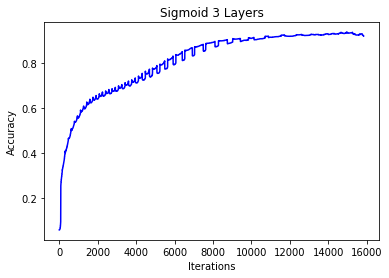

In [14]:
mt.figure('Sigmoid 3 Layers')
mt.plot(range(len(plot_accuracy)), plot_accuracy, 'b', label='lambda=0.0001')

mt.xlabel('Iterations')
mt.ylabel('Accuracy')
mt.title('Sigmoid 3 Layers')
mt.axis('tight')
mt.show()

In [15]:
layers_test=[]
for i in range(len(neurons)):
    lay=Layer()
    
    if(i!=len(neurons)-1):
        theta=layers[i].getTheta()
        lay.setTheta(theta)
    layers_test.append(lay)
    
layers_test[0].setA(X_test)
# Forward propagation
for i in range(1,l):
    z=np.dot(layers_test[i-1].getTheta().T, layers_test[i-1].getA())
    if(i==l-1):
        a=softmax(z)
    else:
        a=sigmoid(z)
        
    layers_test[i].setZ(z)
    layers_test[i].setA(a)

accuracy_test(layers_test[-1].getA().T)

ValueError: nan is not in list